In [0]:
# Basic Libraries
# Testing dsadd 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
trainLabel = pd.read_csv("train_labels.csv")

In [0]:
# import while changing the dtypes of certain columns
trainValue = pd.read_csv("train_values.csv",
                          dtype={
                            'land_surface_condition': 'category',
                            'foundation_type': 'category',
                            'roof_type': 'category',
                            'ground_floor_type': 'category',
                            'other_floor_type': 'category',
                            'position': 'category',
                            'plan_configuration': 'category',
                            'has_superstructure_adobe_mud': 'bool',
                            'has_superstructure_mud_mortar_stone': 'bool',
                            'has_superstructure_stone_flag': 'bool',
                            'has_superstructure_cement_mortar_stone': 'bool',
                            'has_superstructure_mud_mortar_brick': 'bool',
                            'has_superstructure_cement_mortar_brick': 'bool',
                            'has_superstructure_timber': 'bool',
                            'has_superstructure_bamboo': 'bool',
                            'has_superstructure_rc_non_engineered': 'bool',
                            'has_superstructure_rc_engineered': 'bool',
                            'has_superstructure_other': 'bool',
                            'legal_ownership_status': 'category',
                            'has_secondary_use': 'bool',
                            'has_secondary_use_agriculture': 'bool',
                            'has_secondary_use_hotel': 'bool',
                            'has_secondary_use_rental': 'bool',
                            'has_secondary_use_institution': 'bool',
                            'has_secondary_use_school': 'bool',
                            'has_secondary_use_industry': 'bool',
                            'has_secondary_use_health_post': 'bool',
                            'has_secondary_use_gov_office': 'bool',
                            'has_secondary_use_use_police': 'bool',
                            'has_secondary_use_other': 'bool'
                          })

In [0]:
testValue = pd.read_csv("test_values.csv",
                          dtype={
                            'land_surface_condition': 'category',
                            'foundation_type': 'category',
                            'roof_type': 'category',
                            'ground_floor_type': 'category',
                            'other_floor_type': 'category',
                            'position': 'category',
                            'plan_configuration': 'category',
                            'has_superstructure_adobe_mud': 'bool',
                            'has_superstructure_mud_mortar_stone': 'bool',
                            'has_superstructure_stone_flag': 'bool',
                            'has_superstructure_cement_mortar_stone': 'bool',
                            'has_superstructure_mud_mortar_brick': 'bool',
                            'has_superstructure_cement_mortar_brick': 'bool',
                            'has_superstructure_timber': 'bool',
                            'has_superstructure_bamboo': 'bool',
                            'has_superstructure_rc_non_engineered': 'bool',
                            'has_superstructure_rc_engineered': 'bool',
                            'has_superstructure_other': 'bool',
                            'legal_ownership_status': 'category',
                            'has_secondary_use': 'bool',
                            'has_secondary_use_agriculture': 'bool',
                            'has_secondary_use_hotel': 'bool',
                            'has_secondary_use_rental': 'bool',
                            'has_secondary_use_institution': 'bool',
                            'has_secondary_use_school': 'bool',
                            'has_secondary_use_industry': 'bool',
                            'has_secondary_use_health_post': 'bool',
                            'has_secondary_use_gov_office': 'bool',
                            'has_secondary_use_use_police': 'bool',
                            'has_secondary_use_other': 'bool'
                          })

In [0]:
# change the index of the dataframes to be building_id
trainValue.set_index('building_id', inplace=True)
testValue.set_index('building_id', inplace=True)
trainLabel.set_index('building_id', inplace=True)

In [0]:
# resort the dataframes by their new index
trainValue.sort_index(inplace=True)
testValue.sort_index(inplace=True)
trainLabel.sort_index(inplace=True)

In [0]:
trainValue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   geo_level_1_id                          260601 non-null  int64   
 1   geo_level_2_id                          260601 non-null  int64   
 2   geo_level_3_id                          260601 non-null  int64   
 3   count_floors_pre_eq                     260601 non-null  int64   
 4   age                                     260601 non-null  int64   
 5   area_percentage                         260601 non-null  int64   
 6   height_percentage                       260601 non-null  int64   
 7   land_surface_condition                  260601 non-null  category
 8   foundation_type                         260601 non-null  category
 9   roof_type                               260601 non-null  category
 10  ground_floor_type              

In [0]:
trainLabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   damage_grade  260601 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB


In [0]:
testValue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86868 entries, 7 to 1052923
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   geo_level_1_id                          86868 non-null  int64   
 1   geo_level_2_id                          86868 non-null  int64   
 2   geo_level_3_id                          86868 non-null  int64   
 3   count_floors_pre_eq                     86868 non-null  int64   
 4   age                                     86868 non-null  int64   
 5   area_percentage                         86868 non-null  int64   
 6   height_percentage                       86868 non-null  int64   
 7   land_surface_condition                  86868 non-null  category
 8   foundation_type                         86868 non-null  category
 9   roof_type                               86868 non-null  category
 10  ground_floor_type                       8686

In [0]:
trainValue.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,False,True,False,False,False,False,False,False,False,False,False,v,0,False,False,False,False,False,False,False,False,False,False,False
8,17,409,12182,2,0,13,7,t,r,n,f,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,False,False,False,False,True,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False


In [0]:
trainLabel.head()

,damage_grade
building_id,
4,2
8,3
12,3
16,2
17,2


In [0]:
testValue.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,10,151,708,2,25,8,6,t,r,n,f,q,s,d,False,True,False,False,False,False,True,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
13,9,445,203,1,20,3,3,t,r,n,f,j,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
49,10,760,4087,2,25,2,2,n,r,n,x,q,s,d,False,True,False,False,False,False,True,True,False,False,False,v,0,False,False,False,False,False,False,False,False,False,False,False
92,26,1023,11319,2,20,5,4,t,r,n,f,q,s,d,False,True,False,False,False,False,True,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
100,4,1202,5735,1,5,2,3,t,u,q,f,j,t,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False


Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


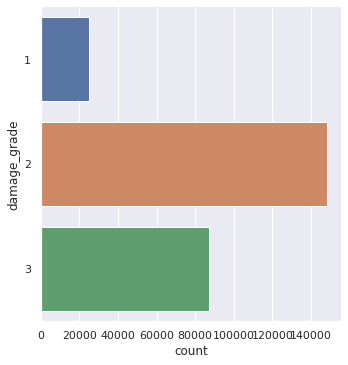

In [0]:
mergedTrain = trainValue.join(trainLabel)
print("Damage Levels :", len(mergedTrain['damage_grade'].unique()))
print(mergedTrain["damage_grade"].value_counts())
sb.catplot(y = "damage_grade", data = mergedTrain, kind = "count")

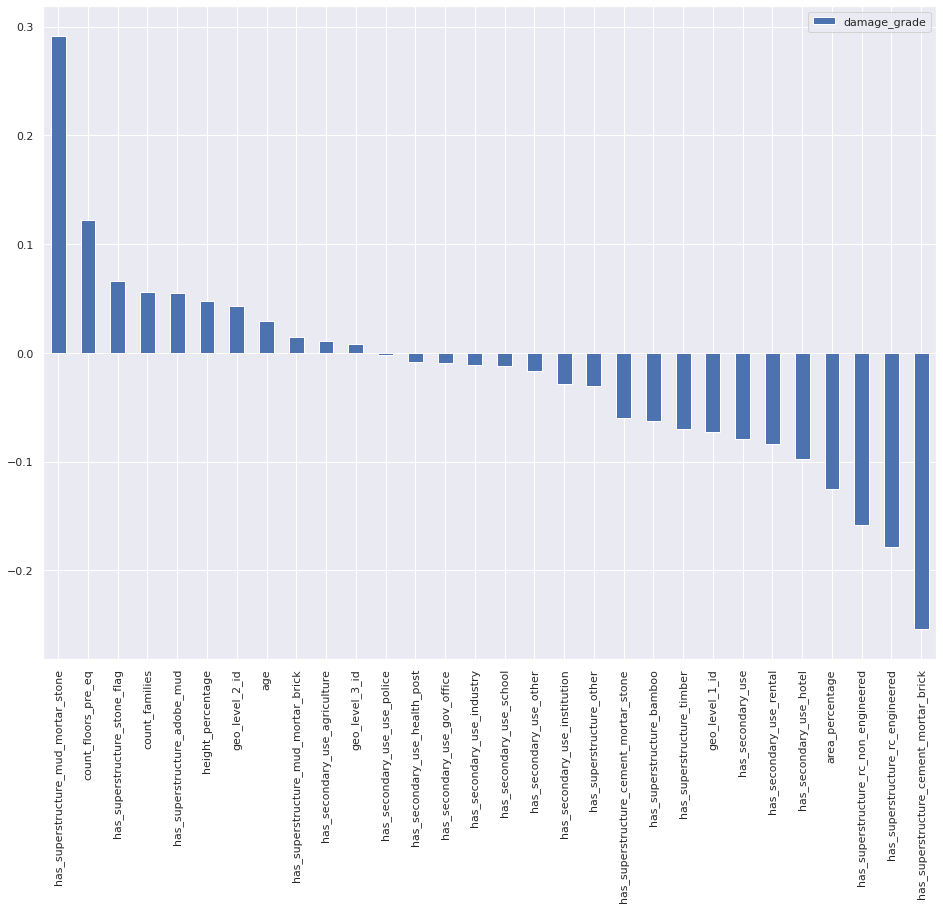

In [0]:
dmg_corr = pd.DataFrame(mergedTrain[mergedTrain.columns].corr()['damage_grade'].sort_values(ascending=False))
dmg_corr = dmg_corr.drop(['damage_grade'])
dmg_corr.plot(kind='bar',figsize=(16,12))

---

We will do some exploration of the features of the data.

First looking at the numeric data.

In [0]:
trainValue.describe().round(0)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0,260601.0
mean,14.0,701.0,6258.0,2.0,27.0,8.0,5.0,1.0
std,8.0,413.0,3646.0,1.0,74.0,4.0,2.0,0.0
min,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
25%,7.0,350.0,3073.0,2.0,10.0,5.0,4.0,1.0
50%,12.0,702.0,6270.0,2.0,15.0,7.0,5.0,1.0
75%,21.0,1050.0,9412.0,2.0,30.0,9.0,6.0,1.0
max,30.0,1427.0,12567.0,9.0,995.0,100.0,32.0,9.0


In [0]:
sb.pairplot(data = trainValue[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id',
                            'count_floors_pre_eq', 'age', 'area_percentage',
                            'height_percentage', 'count_families']],
            height = 2, aspect = 1)

In [0]:
f, axes = plt.subplots(1,1, figsize=(10,10))
sb.heatmap(data = trainValue[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id',
                            'count_floors_pre_eq', 'age', 'area_percentage',
                            'height_percentage', 'count_families']].corr(),
          cmap = "RdBu", annot = True, fmt = ".2f", annot_kws = {'size': 18},
          vmin = -1, vmax = 1)

Here we can see that `count_floors_pre_eq` and `height_percentage` are highly correlated to one another, which is expected as more floors usually correlates to a taller building.

Hence, we can consider dropping `count_floors_pre_eq` from the our DataFrames before performing Classification.


---

Now plotting the correlations of all non-categorical features and `damage_grade`.

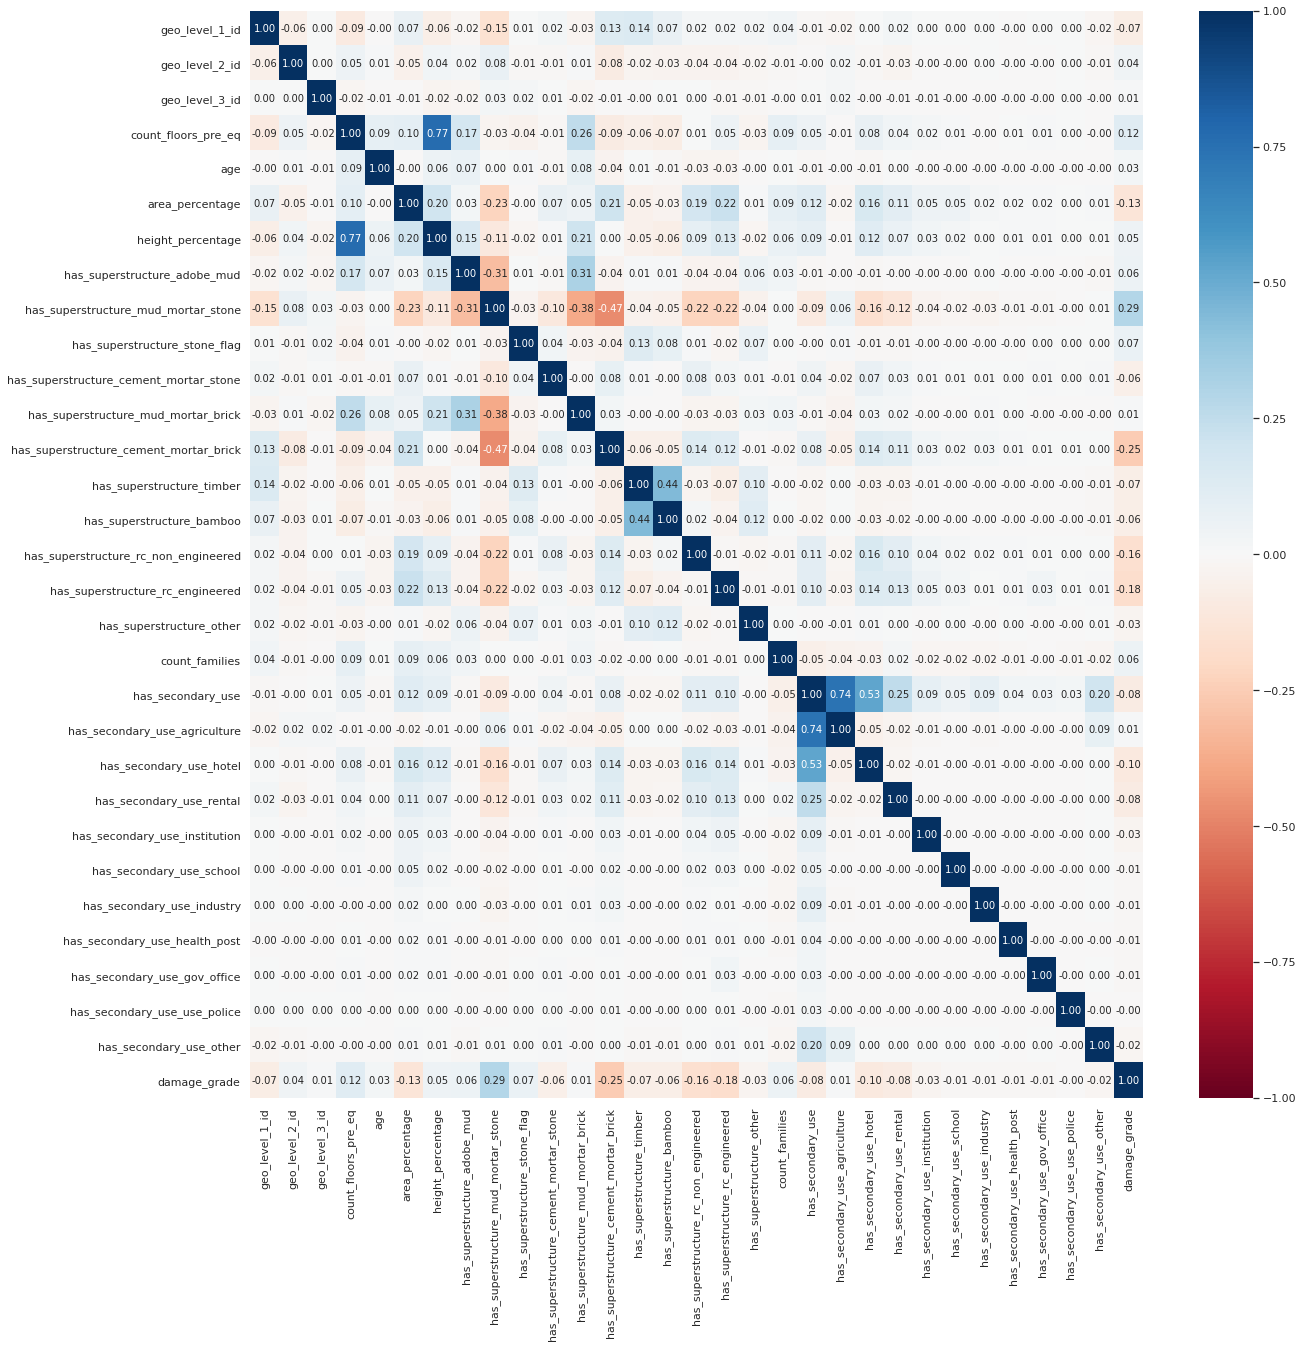

In [0]:
f, axes = plt.subplots(1,1, figsize=(20,20))
sb.heatmap(data = mergedTrain.corr(),
          cmap = "RdBu", annot = True, fmt = ".2f", annot_kws = {'size': 10},
          vmin = -1, vmax = 1)

We can see that `has_secondary_use` is highly correlated to `has_secondary_use_agriculture` and `has_secondary_use_hotel`. This means that of the buildings that have secondary use, a high percentage of them was used for agriculture purposes or as a hotel.

---


Now we will take a look at the categorical features.

In [0]:
categorical_columns =['land_surface_condition', 'foundation_type', 'roof_type', 
                   'ground_floor_type', 'other_floor_type', 'position', 
                   'plan_configuration', 'legal_ownership_status']

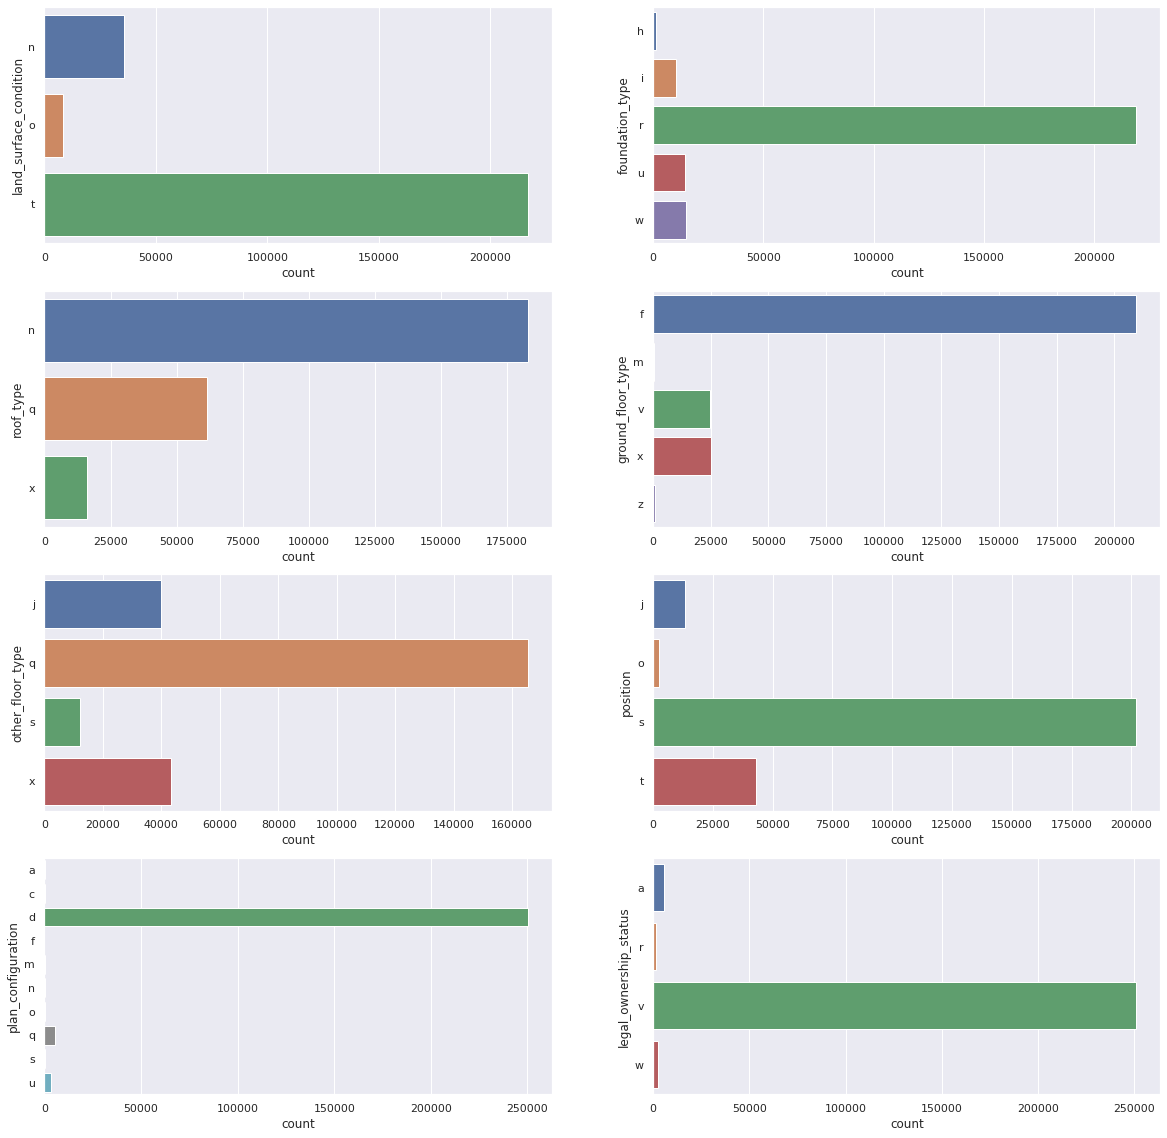

In [0]:
f, axes = f, axes = plt.subplots(4,2, figsize=(20,20))
i=0;
for each in categorical_columns:
  sb.countplot(y = each, data = mergedTrain, ax=axes[i//2,i%2])
  i += 1

In [0]:
for each in categorical_columns:
  print( each + ":", len(mergedTrain[each].unique()))
  print(mergedTrain[each].value_counts())
  print()

land_surface_condition: 3
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

foundation_type: 5
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

roof_type: 3
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

ground_floor_type: 5
f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

other_floor_type: 4
q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

position: 4
s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

plan_configuration: 10
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

legal_ownership_status: 4
v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64



---

To deal with Categorical features, we will perform OneHotEncoding of the Categorical features.

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc = OneHotEncoder(handle_unknown ='ignore')

In [0]:
enc.fit(trainValue[categorical_columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [0]:
enc.categories_

[array(['n', 'o', 't'], dtype=object),
 array(['h', 'i', 'r', 'u', 'w'], dtype=object),
 array(['n', 'q', 'x'], dtype=object),
 array(['f', 'm', 'v', 'x', 'z'], dtype=object),
 array(['j', 'q', 's', 'x'], dtype=object),
 array(['j', 'o', 's', 't'], dtype=object),
 array(['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'], dtype=object),
 array(['a', 'r', 'v', 'w'], dtype=object)]

In [0]:
oneHotEncoded = pd.DataFrame(enc.transform(trainValue[categorical_columns]).toarray().astype('bool')
                                           ).rename( columns = {
        0: 'land_surface_condition_n', 1: 'land_surface_condition_o',
        2: 'land_surface_condition_t', 3: 'foundation_type_h',
        4: 'foundation_type_i', 5: 'foundation_type_r',
        6: 'foundation_type_u', 7: 'foundation_type_w',
        8: 'roof_type_n', 9: 'roof_type_q',
        10: 'roof_type_x', 11: 'ground_floor_type_f',
        12: 'ground_floor_type_m', 13: 'ground_floor_type_v',
        14: 'ground_floor_type_x', 15: 'ground_floor_type_z',
        16: 'other_floor_type_j', 17: 'other_floor_type_q',
        18: 'other_floor_type_s', 19: 'other_floor_type_x',
        20: 'position_j', 21: 'position_o',
        22: 'position_s', 23: 'position_t',
        24: 'plan_configuration_a', 25: 'plan_configuration_c',
        26: 'plan_configuration_d', 27: 'plan_configuration_f',
        28: 'plan_configuration_m', 29: 'plan_configuration_n',
        30: 'plan_configuration_o', 31: 'plan_configuration_q',
        32: 'plan_configuration_s', 33: 'plan_configuration_u',
        34: 'legal_ownership_status_a', 35: 'legal_ownership_status_r',
        36: 'legal_ownership_status_v', 37: 'legal_ownership_status_w'
})

In [0]:
oneHotEncoded.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


Need to reindex oneHotEncoded DataFrame to use `building_id` as index.

In [0]:
oneHotEncoded = pd.DataFrame(trainValue.reset_index()['building_id']).join(oneHotEncoded).set_index('building_id')

In [0]:
oneHotEncoded.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
8,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
12,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
16,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
17,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


We will use this DataFrame in later parts.

---

Here we will find out which features to remove from our Datasets before performing Classification.

For our model, we will be using sklearn's RandomForestClassifier.
For deciding which features to remove, we will be using sklearn's Recursive Feature Elimination.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [0]:
trainValueModified = trainValue.drop(categorical_columns, axis=1)

First we consider all the non-Categorical features.
Hence we will drop all Categorical features.

The next step will take minutes to run.

In [0]:
forest = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)

selector = RFE(forest, 10, step=1)
selector = selector.fit(trainValueModified, trainLabel.values.ravel())

In [0]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  5,  1,  8, 11,  7,  1,  2,  9,  6,  3,
       13,  1,  4, 10, 12, 14, 17, 18, 16, 19, 20, 21, 15])

In [0]:
columns_to_keep = [trainValueModified.columns[i] for i in range(len(trainValueModified.columns)) if list(selector.support_)[i]]
for each in columns_to_keep:
  print(each)

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
has_superstructure_mud_mortar_stone
has_superstructure_cement_mortar_brick
count_families


The above features are the features to be kept based on their importance determined by RFE.

In [0]:
columns_to_drop_rank = { list(selector.ranking_)[i]: trainValueModified.columns[i] for i in range(len(trainValueModified.columns)) if list(selector.ranking_)[i] != 1}
for i in range(len(columns_to_drop_rank)):
  print(i+2, columns_to_drop_rank[i+2])

2 has_superstructure_timber
3 has_superstructure_rc_engineered
4 has_secondary_use
5 has_superstructure_adobe_mud
6 has_superstructure_rc_non_engineered
7 has_superstructure_mud_mortar_brick
8 has_superstructure_stone_flag
9 has_superstructure_bamboo
10 has_secondary_use_agriculture
11 has_superstructure_cement_mortar_stone
12 has_secondary_use_hotel
13 has_superstructure_other
14 has_secondary_use_rental
15 has_secondary_use_other
16 has_secondary_use_industry
17 has_secondary_use_institution
18 has_secondary_use_school
19 has_secondary_use_health_post
20 has_secondary_use_gov_office
21 has_secondary_use_use_police


The above features are the features to be dropped and are ranked based on their importance determined by RFE

In [0]:
trainValueModified = trainValueModified[columns_to_keep]
trainValueModified.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,count_families
building_id,,,,,,,,,,
4,30,266,1224,1,25,5,2,True,False,0
8,17,409,12182,2,0,13,7,True,False,1
12,17,716,7056,2,5,12,6,True,False,1
16,4,651,105,2,80,5,4,True,False,1
17,3,1387,3909,5,40,5,10,False,False,1


Now we will add the One Hot Encoded Categorical features and perform RFE again to see if any of the categorical features are important.

In [0]:
trainValueModified = trainValueModified.join(oneHotEncoded)

In [0]:
trainValueModified.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,count_families,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,True,False,0,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
8,17,409,12182,2,0,13,7,True,False,1,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
12,17,716,7056,2,5,12,6,True,False,1,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
16,4,651,105,2,80,5,4,True,False,1,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
17,3,1387,3909,5,40,5,10,False,False,1,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


The next step will take minutes to run.

In [0]:
selector = selector.fit(trainValueModified, trainLabel.values.ravel())

In [0]:
columns_to_keep = [trainValueModified.columns[i] for i in range(len(trainValueModified.columns)) if list(selector.support_)[i]]
for each in columns_to_keep:
  print(each)

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
has_superstructure_mud_mortar_stone
foundation_type_r
ground_floor_type_v


The above features are the features to be kept based on their importance determined by RFE.

In [0]:
columns_to_drop_rank = { list(selector.ranking_)[i]: trainValueModified.columns[i] for i in range(len(trainValueModified.columns)) if list(selector.ranking_)[i] != 1}
for i in range(len(columns_to_drop_rank)):
  print(i+2, columns_to_drop_rank[i+2])

2 count_families
3 other_floor_type_q
4 roof_type_n
5 ground_floor_type_f
6 position_s
7 has_superstructure_cement_mortar_brick
8 land_surface_condition_t
9 foundation_type_i
10 roof_type_x
11 foundation_type_w
12 position_t
13 plan_configuration_d
14 land_surface_condition_n
15 roof_type_q
16 legal_ownership_status_v
17 other_floor_type_x
18 ground_floor_type_x
19 position_j
20 other_floor_type_s
21 foundation_type_u
22 plan_configuration_q
23 other_floor_type_j
24 land_surface_condition_o
25 legal_ownership_status_a
26 plan_configuration_u
27 legal_ownership_status_w
28 foundation_type_h
29 legal_ownership_status_r
30 position_o
31 ground_floor_type_z
32 ground_floor_type_m
33 plan_configuration_s
34 plan_configuration_c
35 plan_configuration_a
36 plan_configuration_o
37 plan_configuration_n
38 plan_configuration_m
39 plan_configuration_f


The above features are the features to be dropped and are ranked based on their importance determined by RFE

In [0]:
trainValueModified = trainValueModified[columns_to_keep]
trainValueModified.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_mud_mortar_stone,foundation_type_r,ground_floor_type_v
building_id,,,,,,,,,,
4,30,266,1224,1,25,5,2,True,True,False
8,17,409,12182,2,0,13,7,True,True,False
12,17,716,7056,2,5,12,6,True,True,False
16,4,651,105,2,80,5,4,True,True,False
17,3,1387,3909,5,40,5,10,False,True,False


Now we will check what the accuracy of our model with this pruned DataFrame.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(trainValueModified, trainLabel, test_size=0.25)

In [0]:
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
forest.score(X_train, y_train)

0.8517881811204912

In [0]:
forest.score(X_test, y_test)

0.7164586882780003

---

Now, we will analyze the optimal `max_depth` to use for our RandomTreeClassifier.

In [0]:
train_scores = []
test_scores = []
range_to_test = range(10,60)
for i in range_to_test:
    forest = RandomForestClassifier(n_estimators=10, max_depth = i, n_jobs=-1)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

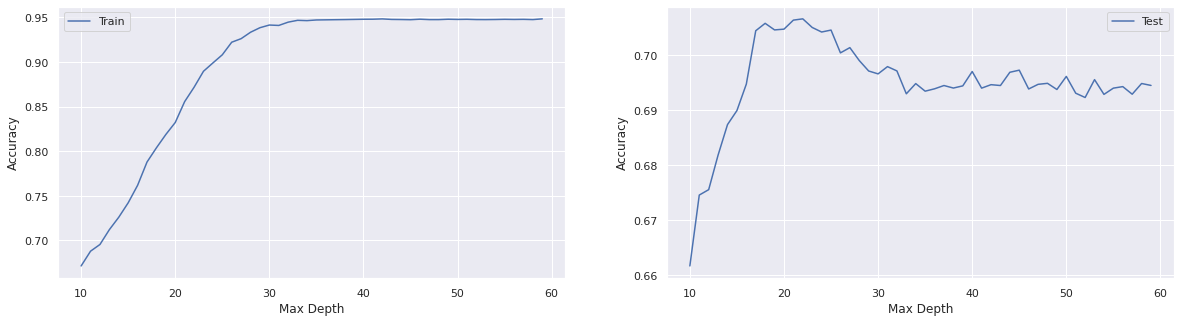

In [0]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Max Depth", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Max Depth", ylabel="Accuracy")
plt.show()

It seems that max depth is optimal at around 20. Hence, we will take `max_depth = 20` from here on.

Now, we will analyze the optimal `n_estimators` to use for our RandomTreeClassifier.

In [0]:
max_depth = 20

This takes very very long to run.

In [0]:
train_scores = []
test_scores = []
range_to_test = range(10,400,20)
for i in range_to_test:
    forest = RandomForestClassifier(n_estimators=i, max_depth = max_depth, n_jobs=-1)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

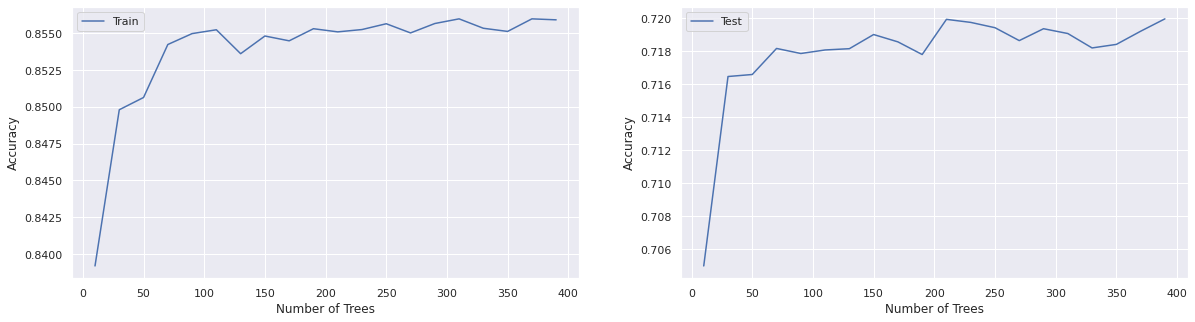

In [0]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Number of Trees", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Number of Trees", ylabel="Accuracy")
plt.show()

Diminishing returns when number of trees are greater than 100. Hence we will take optimal `n_estimators = 100`.

---


Therefore, we will use RandomForestClassifer with 100 trees and max depth of 20.

In [0]:
forest = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(trainValueModified, trainLabel, test_size=0.25)

In [0]:
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
forest.score(X_train, y_train)

0.8542900997697621

In [0]:
forest.score(X_test, y_test)

0.7178247455910116

Now we will plot a confusion matrix to visualise the predictions' accuracy.

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_train_predicted = pd.DataFrame(forest.predict(X_train))
y_test_predicted = pd.DataFrame(forest.predict(X_test))

[Text(0.5, 30.5, 'Test')]

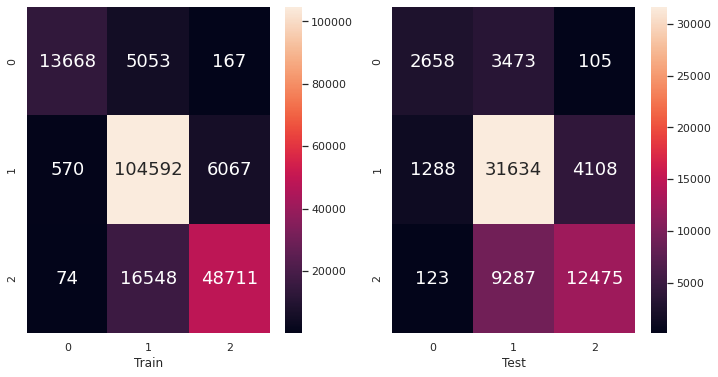

In [0]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.heatmap(confusion_matrix(y_train, y_train_predicted), annot = True, fmt=".0f", annot_kws={"size": 18}, 
           ax = axes[0]).set(xlabel= "Train")
sb.heatmap(confusion_matrix(y_test, y_test_predicted), annot = True, fmt=".0f", annot_kws={"size": 18}, 
           ax = axes[1]).set(xlabel= "Test")


Calculate F1 Score, also known as balanced F-score or F-measure.

In [0]:
from sklearn.metrics import f1_score

In [0]:
f1_score(y_train, y_train_predicted, average='micro')

In [0]:
f1_score(y_test, y_test_predicted, average='micro')

Finally, to predict labels for actual test values. First we need to generate the One Hot Encoding for test values' categorical features.

In [0]:
oneHotEncoded_test = pd.DataFrame(enc.transform(testValue[categorical_columns]).toarray().astype('bool')
                                           ).rename( columns = {
        0: 'land_surface_condition_n', 1: 'land_surface_condition_o',
        2: 'land_surface_condition_t', 3: 'foundation_type_h',
        4: 'foundation_type_i', 5: 'foundation_type_r',
        6: 'foundation_type_u', 7: 'foundation_type_w',
        8: 'roof_type_n', 9: 'roof_type_q',
        10: 'roof_type_x', 11: 'ground_floor_type_f',
        12: 'ground_floor_type_m', 13: 'ground_floor_type_v',
        14: 'ground_floor_type_x', 15: 'ground_floor_type_z',
        16: 'other_floor_type_j', 17: 'other_floor_type_q',
        18: 'other_floor_type_s', 19: 'other_floor_type_x',
        20: 'position_j', 21: 'position_o',
        22: 'position_s', 23: 'position_t',
        24: 'plan_configuration_a', 25: 'plan_configuration_c',
        26: 'plan_configuration_d', 27: 'plan_configuration_f',
        28: 'plan_configuration_m', 29: 'plan_configuration_n',
        30: 'plan_configuration_o', 31: 'plan_configuration_q',
        32: 'plan_configuration_s', 33: 'plan_configuration_u',
        34: 'legal_ownership_status_a', 35: 'legal_ownership_status_r',
        36: 'legal_ownership_status_v', 37: 'legal_ownership_status_w'
})

In [0]:
oneHotEncoded_test = pd.DataFrame(testValue.reset_index()['building_id']).join(oneHotEncoded_test).set_index('building_id')

In [0]:
test_predict = pd.DataFrame(forest.predict( testValue.join(oneHotEncoded_test)[trainValueModified.columns] ), index=testValue.index)

In [0]:
test_predict.set_axis(["damage_grade"], axis=1, inplace=True)

In [0]:
test_predict.head()